# Fitting data of simple pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import g0
from scipy.optimize import curve_fit, minimize
import emcee
import corner

In [2]:
def linear_function(x, a, b):
    return a * x + b

def chi_sq(y_data, y_model, sigma):
    return np.sum((y_data - y_model)**2 / sigma**2)

In [3]:
fname = './data/data_7_group2.csv'
data = pd.read_csv(fname)

In [4]:
print(data.columns)

Index(['L(cm)', '1-10T', '2-10T', '3-10T', '4-10T', '5-10T', 'AVG-10T(s)',
       'L^(1/2)(cm^1/2)'],
      dtype='object')


In [5]:
pendulum_length = np.array(data['L(cm)']) * 1e-2
n_length = len(pendulum_length)
pendulum_length_matrix = np.tile(pendulum_length, 5)
print(pendulum_length)

[0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09  ]


In [6]:
avg_10period      = np.array(data['AVG-10T(s)'])
avg_1period       = avg_10period / 10
period_10swing  = []
for idx, rep in enumerate(range(1,6)):
    period_10swing.append(data[f'{rep}-10T'])
period_10swing = np.array(period_10swing)

std_10period = []
std_1period = []
std_1period_log = []
for i in range(n_length):
    std_10period.append(np.std(period_10swing[:, i]))
    std_1period.append(np.std(period_10swing[:, i]/10))
    std_1period_log.append(np.std(np.log(period_10swing[:, i]/10)))

std_10period = np.array(std_10period)
std_1period = np.array(std_1period)

period_10swing = period_10swing.flatten()
period_1swing = period_10swing / 10

In [7]:
print(pendulum_length)
print(pendulum_length_matrix)
print(avg_1period)
print(period_10swing)
print(std_1period)

[0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09  ]
[0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09  ]
[1.552 1.375 1.317 1.269 1.124 1.036 0.961 0.841 0.733 0.645]
[15.63 13.75 13.21 12.83 11.23 10.33  9.45  8.41  7.36  6.31 15.55 13.61
 13.21 12.55 11.21 10.41  9.76  8.36  7.36  6.5  15.28 13.91 13.15 12.61
 11.3  10.35  9.5   8.43  7.31  6.56 15.46 13.41 13.23 12.81 11.19 10.36
  9.66  8.36  7.33  6.45 15.66 14.06 13.06 12.63 11.28 10.35  9.68  8.51
  7.31  6.45]
[0.01369087 0.02266627 0.00620967 0.0112712  0.00416653 0.00268328
 0.01162755 0.00553534 0.00224499 0.00826075]


In [8]:
l_axis = np.linspace(0.01, 1.0, 100)
t_ideal = 2 * np.pi * np.sqrt(l_axis / g0.value)

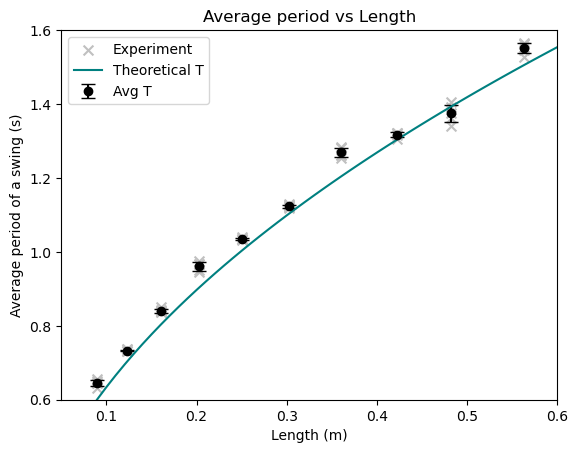

In [9]:
plt.scatter(pendulum_length_matrix, period_1swing, s=50, marker='x', color='silver',
            label=f'Experiment')
    
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal')
plt.xlabel('Length (m)')
plt.ylabel('Average period of a swing (s)')
plt.xlim(left=0.05, right=0.6)
plt.ylim(bottom=0.6, top=1.6)
plt.title('Average period vs Length')
plt.legend()
plt.savefig('./figures/raw_data.pdf', transparent=True)
plt.show()

In [10]:
plt.close('all')

## curve_fit

In [11]:
propt, _ = curve_fit(linear_function, np.log(pendulum_length_matrix), np.log(period_1swing.flatten()))
print(propt)

[0.47067886 0.69149614]


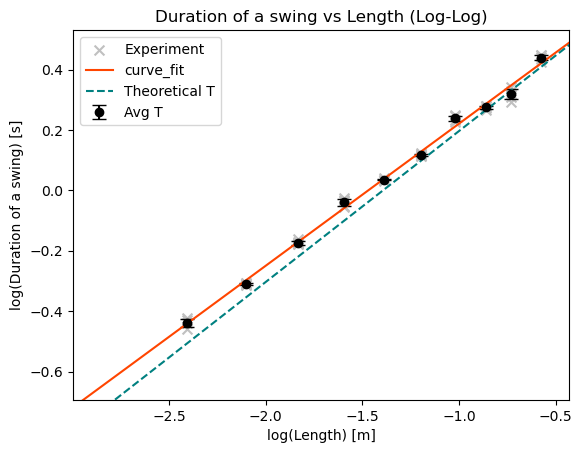

In [12]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period_log, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal', linestyle='--')
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length (Log-Log)')
plt.xlim(left=np.log(0.05), right=np.log(0.65))
plt.ylim(bottom=np.log(0.5), top=np.log(1.7))
plt.legend()
plt.savefig('./figures/curve_fit_log.pdf', transparent=True)
plt.show()

In [13]:
plt.close('all')

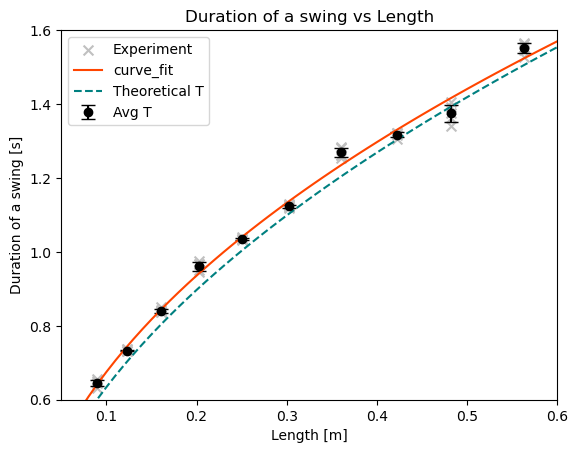

In [14]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal', linestyle='--')
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.05, right=0.6)
plt.ylim(bottom=0.6, top=1.6)
plt.legend()
plt.savefig('./figures/curve_fit.pdf', transparent=True)
plt.show()

In [15]:
plt.close('all')

In [16]:
g_fitted = np.e**(2*(np.log(2*np.pi) - propt[1]))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 9.902 m/s^2
Error = 0.975%


## Least-square

In [17]:
A = np.vander(np.log(pendulum_length_matrix), 2)
C = np.diag(np.log(np.tile(std_1period, 5)) * np.log(np.tile(std_1period, 5)))
ATA = np.dot(A.T, A / (np.log(np.tile(std_1period, 5))**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, np.log(period_1swing) / np.log(np.tile(std_1period, 5))**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))
m_ls = w[0]
b_ls = w[1]


Least-squares estimates:
m = 0.468 ± 1.161
b = 0.688 ± 1.640


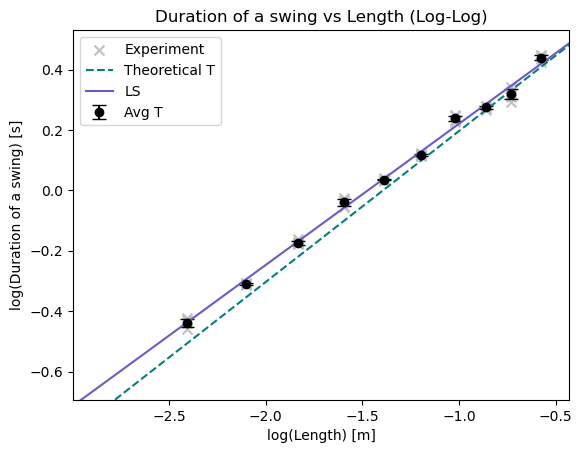

In [18]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period_log, fmt='o', label='Avg T', color='k', capsize=5)
# plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal', linestyle='--')
plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), linestyle="-", color='slateblue', label="LS")
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length (Log-Log)')
plt.xlim(left=np.log(0.05), right=np.log(0.65))
plt.ylim(bottom=np.log(0.5), top=np.log(1.7))
plt.legend()
plt.savefig('./figures/ls_log.pdf', transparent=True)
plt.show()


In [19]:
plt.close('all')

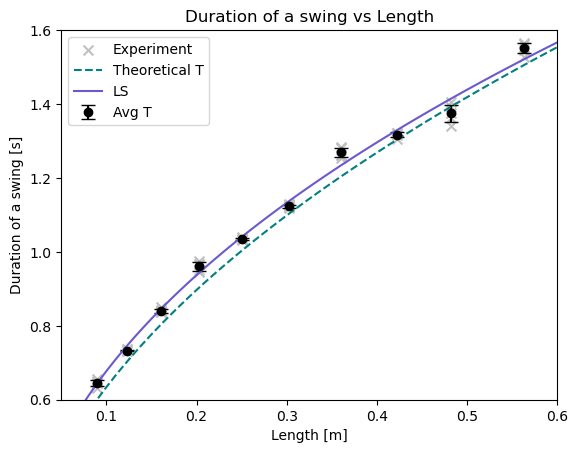

In [20]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
# plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal', linestyle='--')
plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), linestyle="-", color='slateblue', label="LS")
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.05, right=0.6)
plt.ylim(bottom=0.6, top=1.6)
plt.legend()
plt.savefig('./figures/ls.pdf', transparent=True)
plt.show()

In [21]:
plt.close('all')

In [22]:
g_fitted = np.e**(2*(np.log(2*np.pi) - w[1]))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 9.969 m/s^2
Error = 1.660%


## Chi-square

In [23]:
# Define the chi-squared function
def chi_sq_optimization(params, x_data, y_data, sigma):
    model = linear_function(x_data, *params)  # Use your model function
    return chi_sq(y_data, model, sigma)

# Initial guess for the parameters
initial_guess = [0.5, 0.5]  # Adjust based on your model

# Perform the optimization
result = minimize(chi_sq_optimization, initial_guess, 
                  args=(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), np.log(np.tile(std_1period, 5))))

# Extract the optimized parameters
optimized_params = result.x
m_chisq = optimized_params[0]
b_chisq = optimized_params[1]
print("Optimized parameters:", optimized_params)

Optimized parameters: [0.46769473 0.68811451]


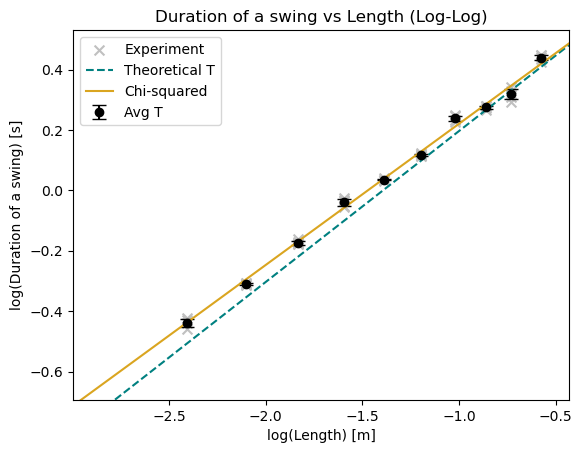

In [24]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period_log, fmt='o', label='Avg T', color='k', capsize=5)
# plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
#          label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal', linestyle='--')
# plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *optimized_params), linestyle="-", color='goldenrod', label="Chi-squared")
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length (Log-Log)')
plt.xlim(left=np.log(0.05), right=np.log(0.65))
plt.ylim(bottom=np.log(0.5), top=np.log(1.7))
plt.legend()
plt.savefig('./figures/chisq_log.pdf', transparent=True)
plt.show()


In [25]:
plt.close('all')

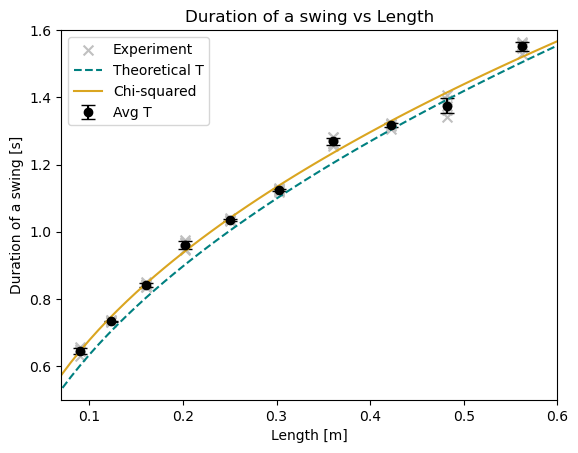

In [26]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
# plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
#          label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal', linestyle='--')
# plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *optimized_params), linestyle="-", color='goldenrod', label="Chi-squared")
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.savefig('./figures/chisq.pdf', transparent=True)
plt.show()

In [27]:
plt.close('all')

In [28]:
g_fitted = np.e**(2*(np.log(2*np.pi) - b_chisq))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 9.969 m/s^2
Error = 1.660%


## MCMC

In [29]:
# Define the log-likelihood function
def log_likelihood(params, x_data, y_data, sigma):
    model = linear_function(x_data, *params)
    return -chi_sq(y_data, model, sigma)

# Define the log-prior function (flat priors in this case)
def log_prior(params):
    a, b = params
    if -10 < a < 10 and -10 < b < 10:  # Adjust bounds as needed
        return 0.0  # Flat prior
    return -np.inf  # Log(0) for invalid parameters

# Define the log-posterior function
def log_posterior(params, x_data, y_data, sigma):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x_data, y_data, sigma)


In [30]:

# Set up the MCMC sampler
ndim = 2  # Number of parameters (a and b)
nwalkers = 20  # Number of walkers
nsteps = 10000  # Number of steps
initial_guess = [m_chisq, b_chisq]  # Initial guess for parameters
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)  # Initialize walkers


In [31]:
progress_file = "progress.h5"
backend = emcee.backends.HDFBackend(progress_file)

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, backend=backend, 
                                args=(np.log(pendulum_length_matrix), 
                                      np.log(period_1swing.flatten()), 
                                      np.log(np.tile(std_1period, 5))))

# Run the MCMC
sampler.run_mcmc(pos, nsteps, progress=True)


100%|██████████| 10000/10000 [00:20<00:00, 486.49it/s]


State([[ 1.13719776  0.7729887 ]
 [ 0.77854994  1.3110369 ]
 [-0.71029818 -0.81228396]
 [-0.06343002 -0.34476719]
 [ 0.88567153  0.97794394]
 [ 1.02239615  1.24910199]
 [-0.68966154 -0.25716426]
 [-0.70947787 -0.58298975]
 [ 1.38600995  2.16697529]
 [ 1.45235046  1.80009429]
 [ 0.50800038  1.00972933]
 [ 0.4085658   0.20347384]
 [ 1.67893326  3.00641019]
 [ 1.17180487  1.34366485]
 [ 0.83127013  0.93161618]
 [ 0.36982301 -0.0148539 ]
 [ 0.4756618   0.96744029]
 [ 1.44768271  2.22666845]
 [-0.73873345 -0.98464879]
 [ 0.83762133  0.60494432]], log_prob=[-1.63236501 -0.180578   -1.03085959 -0.47555316 -0.26264091 -0.2790057
 -1.62896315 -1.15501013 -0.81962879 -0.7709977  -0.15946576 -0.36436294
 -2.34365745 -0.50291678 -0.20711554 -0.72785372 -0.15745001 -0.88206142
 -1.1132564  -0.77635315], blobs=None, random_state=('MT19937', array([ 599995554,  252023911,  610794405, 3022615660,    1539449,
       1154941027,  795360831, 2195008746,   40380795, 2812731068,
       1645794477, 16850767

In [32]:
sampler = emcee.backends.HDFBackend("progress.h5")

# Extract the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Print the results
m_mcmc, b_mcmc = np.mean(samples, axis=0)
print(f"MCMC results: m = {m_mcmc:.3f}, b = {b_mcmc:.3f}")

MCMC results: m = 0.470, b = 0.692


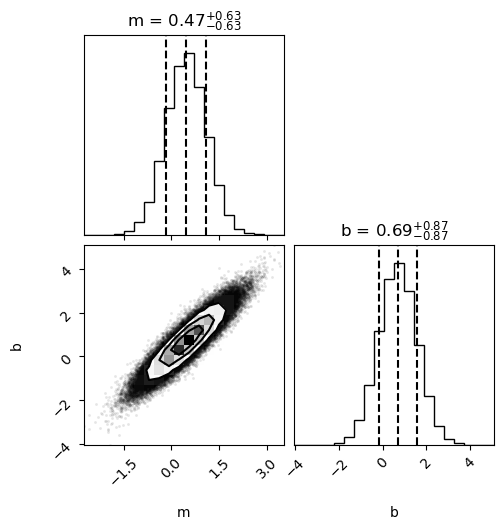

In [33]:
# Corner plot
fig_corner = corner.corner(samples, labels=['m', 'b'], show_titles=True, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84])
# fig_corner.suptitle("Corner Plot of MCMC Results")
plt.savefig('./figures/corner.pdf', transparent=True)
plt.show()

In [34]:
plt.close('all')

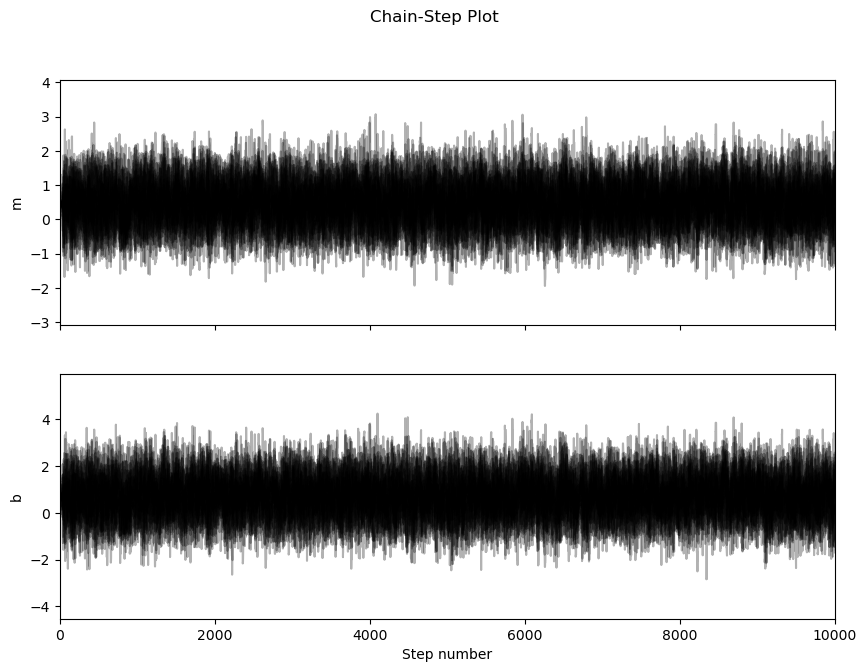

In [35]:

# Chain-step plot
fig_chain, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler.get_chain()[:, :, i], "k", alpha=0.3)
    if i == 0:
        ax.set_ylabel("m")
    else:
        ax.set_ylabel(f"b")
    ax.set_xlim(left=0, right=nsteps)
axes[-1].set_xlabel("Step number")
fig_chain.suptitle("Chain-Step Plot")
plt.savefig('./figures/chain.pdf', transparent=True)
plt.show()

In [36]:
plt.close('all')

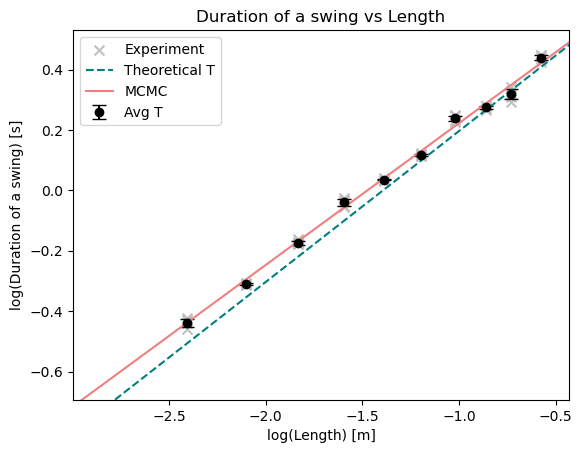

In [37]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period_log, fmt='o', label='Avg T', color='k', capsize=5)
# plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
#          label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal', linestyle='--')
# plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
# plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *optimized_params), "--b", label="Chi-squared")
plt.plot(np.log(l_axis), (m_mcmc*np.log(l_axis)+b_mcmc), color='lightcoral',linestyle='-', label=f'MCMC')
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=np.log(0.05), right=np.log(0.65))
plt.ylim(bottom=np.log(0.5), top=np.log(1.7))
plt.legend()
plt.savefig('./figures/mcmc_log.pdf', transparent=True)
plt.show()


In [38]:
plt.close('all')

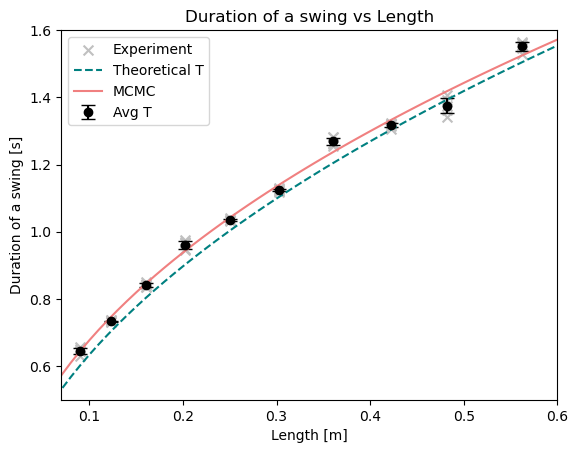

In [39]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
# plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
#          label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal', linestyle='--')
# plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
# plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *optimized_params), "--b", label="Chi-squared")
plt.plot(l_axis, np.e**(m_mcmc*np.log(l_axis)+b_mcmc), color='lightcoral',linestyle='-', label=f'MCMC')
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.savefig('./figures/mcmc.pdf', transparent=True)
plt.show()

In [40]:
plt.close('all')

In [41]:
g_fitted = np.e**(2*(np.log(2*np.pi) - b_mcmc))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 9.887 m/s^2
Error = 0.823%


## Comparison of all methods

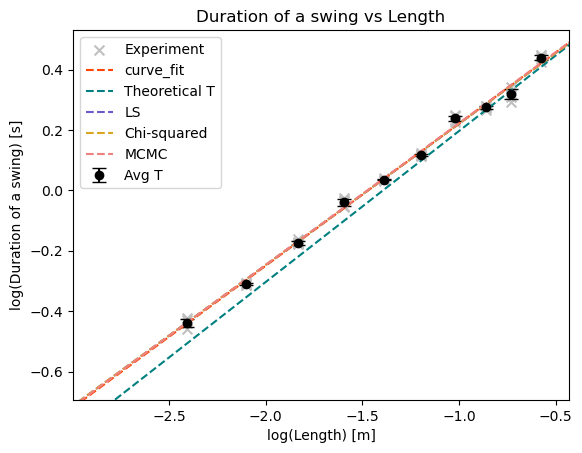

In [42]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period_log, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
         label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal', linestyle='--')
plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), linestyle="--", color='slateblue',label="LS")
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *optimized_params), linestyle="--", color='goldenrod', label="Chi-squared")
plt.plot(np.log(l_axis), (m_mcmc*np.log(l_axis)+b_mcmc), color='lightcoral',linestyle='--', label=f'MCMC')
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=np.log(0.05), right=np.log(0.65))
plt.ylim(bottom=np.log(0.5), top=np.log(1.7))
plt.legend()
plt.savefig('./figures/all_log.pdf', transparent=True)
plt.show()


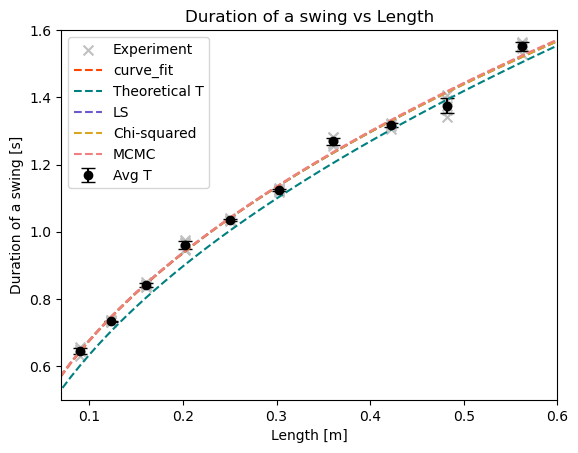

In [43]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
         label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal', linestyle='--')
plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), linestyle="--", color='slateblue', label="LS")
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *optimized_params), linestyle="--", color='goldenrod', label="Chi-squared")
plt.plot(l_axis, np.e**(m_mcmc*np.log(l_axis)+b_mcmc), color='lightcoral',linestyle='--', label=f'MCMC')
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.savefig('./figures/all.pdf', transparent=True)
plt.show()

In [44]:
print(f'Ideal g = {g0.value:.3f} m/s^2')
print("-------------------------------------")
print(f'Fitted g (curve_fit) = {g_fitted:.3f} m/s^2')
print(f'Error (curve_fit) = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')
print("-------------------------------------")
print(f'Fitted g (LS) = {np.e**(2*(np.log(2*np.pi) - b_ls)):.3f} m/s^2')
print(f'Error (LS) = {np.abs(np.e**(2*(np.log(2*np.pi) - b_ls)) - g0.value) / g0.value * 100:.3f}%')
print("-------------------------------------")
print(f'Fitted g (Chi-squared) = {np.e**(2*(np.log(2*np.pi) - b_chisq)):.3f} m/s^2')
print(f'Error (Chi-squared) = {np.abs(np.e**(2*(np.log(2*np.pi) - b_chisq)) - g0.value) / g0.value * 100:.3f}%')
print("-------------------------------------")
print(f'Fitted g (MCMC) = {np.e**(2*(np.log(2*np.pi) - b_mcmc)):.3f} m/s^2')
print(f'Error (MCMC) = {np.abs(np.e**(2*(np.log(2*np.pi) - b_mcmc)) - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
-------------------------------------
Fitted g (curve_fit) = 9.887 m/s^2
Error (curve_fit) = 0.823%
-------------------------------------
Fitted g (LS) = 9.969 m/s^2
Error (LS) = 1.660%
-------------------------------------
Fitted g (Chi-squared) = 9.969 m/s^2
Error (Chi-squared) = 1.660%
-------------------------------------
Fitted g (MCMC) = 9.887 m/s^2
Error (MCMC) = 0.823%
